# CURSO: MINERIA DE DATOS
# ALUMNO: HUILLCA MOZO, BRYAN
# CODIGO: 160329 

# **TEMA ALGORITMO DE APRIORI**


  





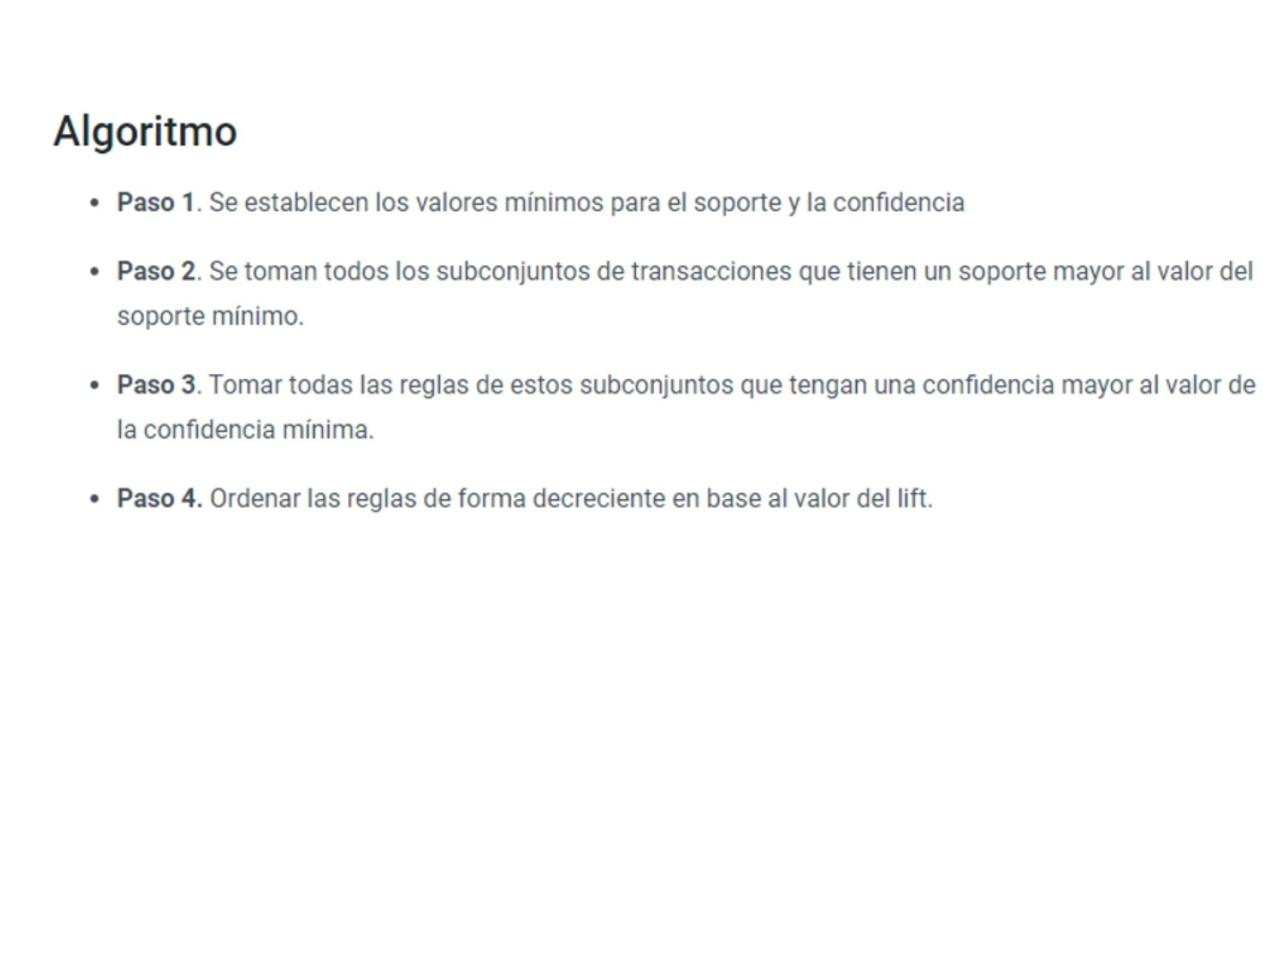

# **PASOS**

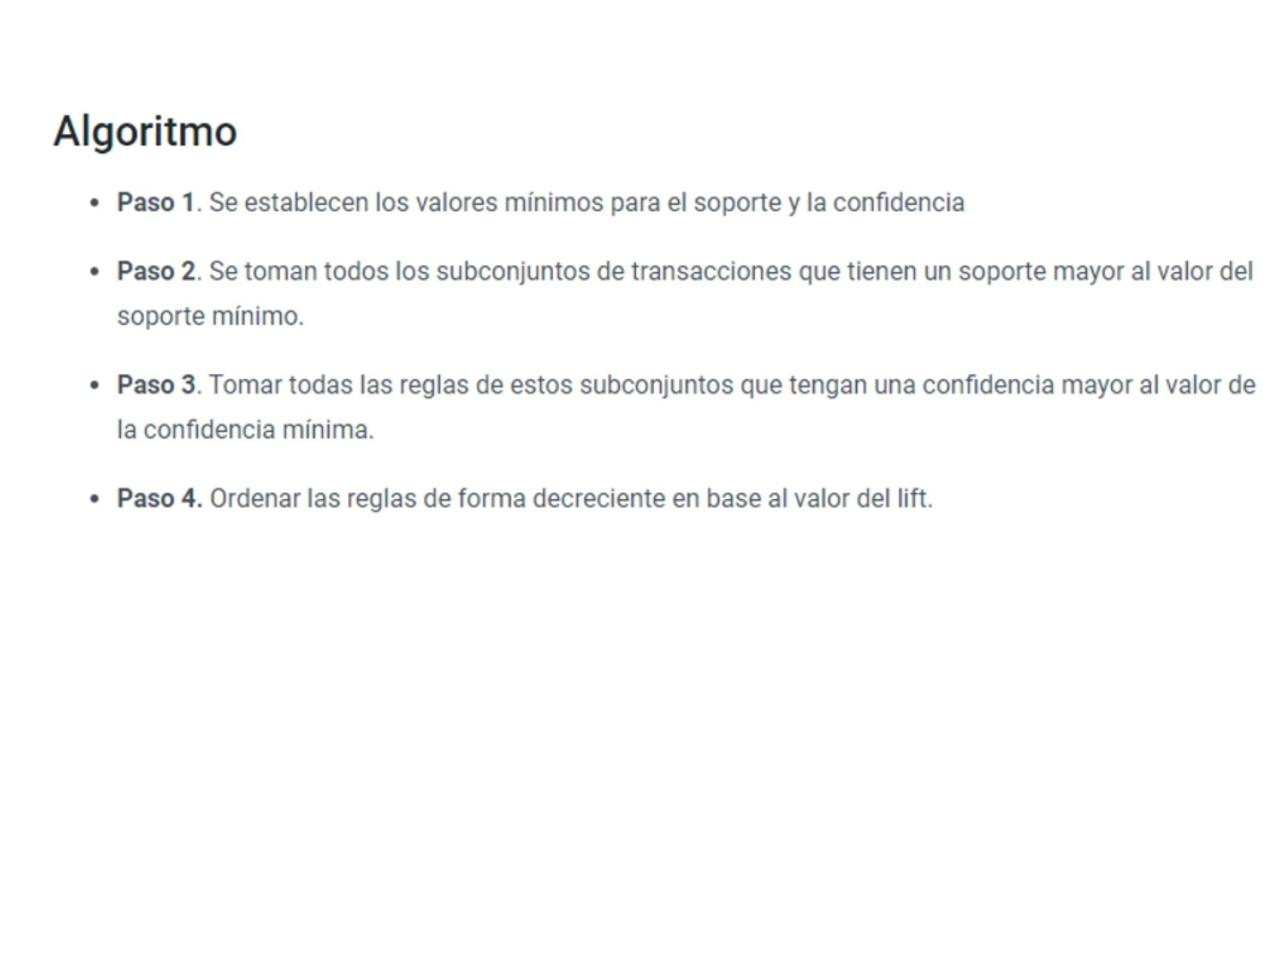

# LIBRERIAS QUE USAREMOS

In [111]:
import numpy as np
import pandas as pd
import itertools as iter


# IMPORTAR LIBRERIAS DE ITERTOOLS

In [67]:
# Importar groupby, chain, combinations de intertools
from itertools import groupby, chain, combinations

# CARGAR BD SPOTIFY.NPY Y CONVERTIRLA EN UN DATAFRAME

In [76]:
#Importamos los datos de la db con load numpy
db =np.load('spotify.npy',allow_pickle=True)
#Transformamos a un iterable
R = db.tolist()
lista = [R[i] for i in R]
#tranformamos en un dataframe
dfSpotify = pd.DataFrame(lista)

# Mostramos el dataFrame  original que esta dadad por 10000 filas por 250 columnas

In [77]:
dfSpotify

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,Lose Control (feat. Ciara & Fat Man Scoop),Toxic,Crazy In Love,Rock Your Body,It Wasn't Me,Yeah!,My Boo,Buttons,Say My Name,Hey Ya! - Radio Mix / Club Mix,Promiscuous,Right Where You Want Me - Radio Edit Version,Beautiful Soul,Leavin',Me & U,Ice Box,Sk8er Boi,Run It!,Check On It - feat. Bun B and Slim Thug,"Jumpin', Jumpin'",Soak Up The Sun,Where Is The Love?,Stacy's Mom,Just The Girl,Yo (Excuse Me Miss),Year 3000,Lip Gloss,Everytime We Touch - Radio Edit,Whatcha Say,Miss Independent,Party In The U.S.A.,The Great Escape,Replay,Forever,Your Love Is My Drug,Closer,One Less Lonely Girl,Paper Planes,Mr. Brightside,All The Small Things,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fathoms Below - Broadway Cast Recording,Daughters Of Triton - Broadway Cast Recording,The World Above - Broadway Cast Recording,Human Stuff - Broadway Cast Recording,I Want the Good Times Back - Broadway Cast Rec...,Part Of Your World,Storm at Sea - Broadway Cast Recording,Part Of Your World (Reprise) - Broadway Cast R...,She's in Love - Broadway Cast Recording,Her Voice - Broadway Cast Recording,The World Above (Reprise) - Broadway Cast Reco...,Under the Sea - Broadway Cast Recording,Under the Sea (Reprise) - Broadway Cast Recording,Sweet Child - Broadway Cast Recording,Poor Unfortunate Souls - Broadway Cast Recording,Positoovity - Broadway Cast Recording,Beyond My Wildest Dreams - Broadway Cast Recor...,One Step Closer - Broadway Cast Recording,I Want the Good Times Back (Reprise) - Broadwa...,Kiss the Girl - Broadway Cast Recording,Sweet Child (Reprise) - Broadway Cast Recording,If Only (Quartet) - Broadway Cast Recording,The Contest - Broadway Cast Recording,Poor Unfortunate Souls (Reprise) - Broadway Ca...,If Only (Reprise) - Broadway Cast Recording,Finale - Broadway Cast Recording,"Kiss the Girl - From ""The Little Mermaid""/Soun...","Poor Unfortunate Souls - From ""The Little Merm...","Part of Your World (Reprise) - From ""The Littl...","Under the Sea - From ""The Little Mermaid""/ Sou...","Part of Your World - From ""The Little Mermaid""...","Daughters of Triton - From ""The Little Mermaid...",Kiss the Girl,"Under the Sea - From ""The Little Mermaid""/ Sou...","Part of Your World - From ""The Little Mermaid""...","Poor Unfortunate Souls - From ""The Little Merm...","Kiss the Girl - From ""The Little Mermaid""/Soun...","Happy Ending - From ""The Little Mermaid""/ Soun...","Main Title - The Little Mermaid - From ""The Li...",Overture - Broadway Cast Recording,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,ABC,Point/Counterpoint,Billie Jean,Basket Case,Seven Nation Army,1985,Rollup - Baauer Remix,Dirt Off Your Shoulder,"So Ruff, So Tuff",Snow (Hey Oh) - Hey Oh Album Version,Werewolves Of London - 2007 Remastered Version,Two Princes,Jailhouse,Black Betty,Moar Ghosts 'n' Stuff,Acid Raindrops,Guns Are Drawn,Disco Inferno,Ignition - Remix,Life's Been Good,Black River Killer,Amazing,Young Americans - 2016 Remastered Version,Fame - 2016 Remastered Version,How We Do - Radio Edit,Never Say Goodbye - Radio Edit,Peace Frog,Animals - Extended,Fitzpleasure,Officer,The Message,Hey Brother,Hypnotize - 2014 Remastered Version,Big Poppa,Juicy,My Band,The Next Episode,Jessie's Girl,Feels Like the First Time - 2008 Remastered Ve...,Hot Blooded,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [78]:
#Mostramos mediante una tupla el número de filas y columnas del DataFrame
dfSpotify.shape

(10000, 250)

In [79]:
# Restringimos el tamaño esto debido a la cantidad de datos a usarse y 
# el tiempo que demoraria en cargar nuestro dataframe seria demasiado para la carga de datos y operaciones.
# 200 filas X 150 columnas
dfSpotify = dfSpotify.iloc[0:200,0:150]

In [80]:
dfSpotify.shape

(200, 150)

# Mostramos el nuevo dataframe con 200 columnas y 150 filas

In [81]:
dfSpotify

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,Lose Control (feat. Ciara & Fat Man Scoop),Toxic,Crazy In Love,Rock Your Body,It Wasn't Me,Yeah!,My Boo,Buttons,Say My Name,Hey Ya! - Radio Mix / Club Mix,Promiscuous,Right Where You Want Me - Radio Edit Version,Beautiful Soul,Leavin',Me & U,Ice Box,Sk8er Boi,Run It!,Check On It - feat. Bun B and Slim Thug,"Jumpin', Jumpin'",Soak Up The Sun,Where Is The Love?,Stacy's Mom,Just The Girl,Yo (Excuse Me Miss),Year 3000,Lip Gloss,Everytime We Touch - Radio Edit,Whatcha Say,Miss Independent,Party In The U.S.A.,The Great Escape,Replay,Forever,Your Love Is My Drug,Closer,One Less Lonely Girl,Paper Planes,Mr. Brightside,All The Small Things,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fathoms Below - Broadway Cast Recording,Daughters Of Triton - Broadway Cast Recording,The World Above - Broadway Cast Recording,Human Stuff - Broadway Cast Recording,I Want the Good Times Back - Broadway Cast Rec...,Part Of Your World,Storm at Sea - Broadway Cast Recording,Part Of Your World (Reprise) - Broadway Cast R...,She's in Love - Broadway Cast Recording,Her Voice - Broadway Cast Recording,The World Above (Reprise) - Broadway Cast Reco...,Under the Sea - Broadway Cast Recording,Under the Sea (Reprise) - Broadway Cast Recording,Sweet Child - Broadway Cast Recording,Poor Unfortunate Souls - Broadway Cast Recording,Positoovity - Broadway Cast Recording,Beyond My Wildest Dreams - Broadway Cast Recor...,One Step Closer - Broadway Cast Recording,I Want the Good Times Back (Reprise) - Broadwa...,Kiss the Girl - Broadway Cast Recording,Sweet Child (Reprise) - Broadway Cast Recording,If Only (Quartet) - Broadway Cast Recording,The Contest - Broadway Cast Recording,Poor Unfortunate Souls (Reprise) - Broadway Ca...,If Only (Reprise) - Broadway Cast Recording,Finale - Broadway Cast Recording,"Kiss the Girl - From ""The Little Mermaid""/Soun...","Poor Unfortunate Souls - From ""The Little Merm...","Part of Your World (Reprise) - From ""The Littl...","Under the Sea - From ""The Little Mermaid""/ Sou...","Part of Your World - From ""The Little Mermaid""...","Daughters of Triton - From ""The Little Mermaid...",Kiss the Girl,"Under the Sea - From ""The Little Mermaid""/ Sou...","Part of Your World - From ""The Little Mermaid""...","Poor Unfortunate Souls - From ""The Little Merm...","Kiss the Girl - From ""The Little Mermaid""/Soun...","Happy Ending - From ""The Little Mermaid""/ Soun...","Main Title - The Little Mermaid - From ""The Li...",Overture - Broadway Cast Recording,...,No Other Way - Broadway Cast Recording,I Need to Know - Broadway Cast Recording,Son of Man - Broadway Cast Recording,Sure As Sun Turns to Moon - Broadway Cast Reco...,Waiting For This Moment - Broadway Cast Recording,Different - Broadway Cast Recording,Trashin' The Camp - Broadway Cast Recording,Like No Man I've Ever Seen - Broadway Cast Rec...,Strangers Like Me - Broadway Cast Recording,For The First Time - Broadway Cast Recording,Who Better Than Me? (Reprise) - Broadway Cast ...,Everything That I Am - Broadway Cast Recording,You'll Be In My Heart (Reprise) - Broadway Cas...,Sure As Sun Turns to Moon (Reprise) - Broadway...,Two Worlds (Finale) - Broadway Cast Recording,Everything That I Am - Broadway Cast Recording,"There's A Party Here In Agrabah, Part I","There's A Party Here In Agrabah, Part II",Welcome To The Forty Thieves,Out Of Thin Air,Are You In Or Out?,Father And Son,Arabian Nights Reprise,Forget About Love (The Return Of Jafar),"You're Only Second Rate - From ""The Return of ...",I'm Looking Out For Me (The Return Of Jafar),Wedding/Attack Of The Forty

In [82]:
#Verificamos si tenemos valores nulos
dfSpotify.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Tr

# Calculo de los datos de la longitud del dataframe convertid

In [110]:
Cant_records = len(dfSpotify)
# Mostramos la longitud
print(Cant_records)

200


In [116]:
#ubicacion de un item y despues devolver la longitud de lista
def Contar(item, playlists):
  #ubicacion de un item 
  if(type(item) is str):
    item = [item]
  # si existe un item en las transacciones
  c = lambda seq: set(item).issubset(set(seq)) 
  return len(list(filter(c, playlists))) 

#MOSTRAR  REGLAS

In [117]:
#Modulo para mostrar las reglas
def Mostrar_Reglas(reglas):
    for k in reglas:
        # Mostrando estos valores con la siguiente estructura
        print(" ======= REGLA DE ASOCIACIÓN =======")
        if(str(k[0])==1):
            print(str(k[0]),'--------',k[1])
        else:
            print(k[0],'--------',k[1])
        print("SUPPORT: ",k[2])
        print("CONFIDENCE:  ",k[3])
        print("LIFT:        " ,k[4])

#MODULO PARA HALLAR LOS ITEMS

In [118]:
def Combinar(item, cantidad):
  # Combinar la cantidad de items
  if(cantidad == 2 and type(item[0]) == str):

    return sorted(list(combinations(item, cantidad))) 
 
  else:

    B = []
    #Hacer Combinaciones de a dos
    t1 = list(combinations(item, 2)) 
    t2 = [tuple(set(iter.chain(*k))) for k in t1 if (k[0][0] == k[1][0] and len(set(iter.chain(*k))) == cantidad)]
    for k in t2:
      # Si los items no se repiten, entonces agregamos a B
      if k not in B:
        B.append(tuple(sorted(k))) 
    #Devolvemos B
    return B


# MODULO GET_FREQUENT_ITEMSETS
#RECIBE  LA PLAYLIST Y DEVUELVE ITEMS FRECUENTES

In [120]:
def get_frequent_itemsets(playlists, min_support):
  #longitud de la playlist
  longitud = len(playlists)
 
  # contar las indicencias en las transacciones
  TotalItems = list(iter.chain(*playlists))
  P_item = [(k, len(list(j))/n) for k, j in groupby(sorted(TotalItems))] 

  # lista en la que se cumple que: Items >= min_support
  TuplasFrec = [(k,i) for K,i in one_item if i >= min_support] 
 
  #Conversion a Dataframe pa los resultados proximos
  dfItems = pd.DataFrame(TuplasFrec) 
  dfItems = dfItems.rename(columns = {0:'items', 1:'support'})
  print(len(dfItems) )

  #lista para el dataframe final
  B = []  
  #  inicializacion
  k = 2
  # si el dataframe es mayor que 1, entonces se debe cumplir
  if(len(dfItems)>=2):
    # combinamos los items
    CantItem = Combinar(list(dfItems['items']), k)
    #Imprimimos los items
    print(str(k) + '_items: ', len(CantItem))

    dfCantItem = pd.DataFrame()
    dfCantItem['items'] = CantItem
    #Items en las transacciones
    dfCantItem['count'] = dfCantItem['items'].apply(contar,playlists) 
    # support de cada item
    dfCantItem['support'] = dfCantItem['count']/longitud 
    # Establecemos que el support debe ser mayor o igual al min:support
    dfTotalItems = dfCantItem[dfCantItem['support'] >= min_soporte] 
    #mostramos la longitud
    print(len(dfTotalItems))
    print("")
    k = k + 1
    # agregamos a la lista final
    B.append(dfTotalItems) 
  return pd.concat([B[i] for i in range(len(B))])

# MODULO GENERAR REGLAS

In [126]:
#Posibles reglas a generar
def GenerarReglas(item):
  # para 2 item
  if len(item) == 2:
    return [(item[0], item[1]), (item[1], item[0])] 
  else:
    T1 = []
    #complemento
    c = lambda k, conj: tuple(set(conj) - set(k)) 
    for i in range(len(item)-1, 0,-1):
      #Para que no hayan reglas duplicadas
      T1 += [(k, c(k, item)) for k in list(combinations(item, i)) if c(k, item) not in T1]
    return T1

#MODULO GENERAR REGLAS DE ASOCIACION

In [123]:
# La funcion recibe un dataframe de n_items mas frecuentes y la lista de transacciones
def generate_association_rules(frequent_itemsets, transacciones ,confidence = 0, lift = 0):
  # Encontramos todas las posibles reglas en base al conjunto frecuente
  reglas =[]
  for i, row in frequent_itemsets.iterrows():
    dfT1 = pd.DataFrame()
    reglasT = GenerarReglas(row['items'])
    dfT1['izq'] = [e[0] for e in reglasT]
    dfT1['der'] = [e[1] for e in reglasT]
    dfT1['count'] = [row['count']] * len(reglasT)
    reglas.append(dfT1)
  df_rules = pd.concat([e for e in reglas])

  # Hallamos los indicen de confianza y lift
  dfReglita['count der'] = dfReglita['der'].apply(Contar, list_playlists = transactions)
  dfReglita['confidence'] = dfReglita['count']/dfReglita['count der']
  dfReglita['support'] = dfReglita['count']/len(transactions)
  dfReglita['support der'] = dfReglita['count der'] / len(transactions)
  dfReglita['lift'] = dfReglita['confidence'] / dfReglita['support der']

  # filtramos las reglas que cumplan con los umbrales de confidence y lift
  dfReglitaFinalT1 = dfReglita[dfReglita['confidence'] >= confidence]
  dfReglitafinal = [dfReglitaFinalT1 ['lift'] >= lift]

  return dfReglitafinal.drop(['count', 'count der', 'support der'], axis=1)

In [90]:
# convertimos nuestro dataframe en una lista de listas
playlists = dfSpotify
list_playlists = dfSpotify.to_numpy().tolist()

In [89]:
playlists = np.load('spotify.npy', allow_pickle=True)
# convertir en una lista de listas
list_playlists = list(playlists.tolist().values())

In [96]:
#Establecemos los parametros para las transaaciones
transacciones = list_playlists


In [97]:
#Asignamos cuanto sera el minimo soporte
min_soporte= 0.016 

#ITEMS FRECUENTES

In [62]:
set_f = get_frequent_itemsets(list_playlists, 0.016)
len(set_f)

10000
1_items:  132920
293 

2_items:  42778
12 

3_items:  10
0 



12

#MOSTRANDO LOS CONJUNTOS

In [99]:

set_f

,items,count,support
6205,"(Bad and Boujee (feat. Lil Uzi Vert), Bounce B...",169,0.0169
6268,"(Bad and Boujee (feat. Lil Uzi Vert), HUMBLE.)",167,0.0167
10146,"(Broccoli (feat. Lil Yachty), Caroline)",172,0.0172
15088,"(Congratulations, HUMBLE.)",214,0.0214
15140,"(Congratulations, Mask Off)",162,0.0162
15268,"(Congratulations, XO TOUR Llif3)",179,0.0179
15278,"(Congratulations, iSpy (feat. Lil Yachty))",162,0.0162
16477,"(DNA., HUMBLE.)",190,0.0190
23914,"(HUMBLE., Mask Off)",204,0.0204
24042,"(HUMBLE., XO TOUR Llif3)",204,0.0204


In [64]:
rules = generate_association_rules(set_f, trans, confidence=0.5, lift=1.2)

In [115]:
#reglas

rules

,izq,der,confidence,support,lift
0,Bad and Boujee (feat. Lil Uzi Vert),Bounce Back,0.569024,0.0169,19.159043
1,HUMBLE.,Congratulations,0.531017,0.0214,13.176610
0,Congratulations,Mask Off,0.512658,0.0162,16.223362
0,Congratulations,XO TOUR Llif3,0.554180,0.0179,17.157262
1,HUMBLE.,DNA.,0.822511,0.0190,35.606529
0,HUMBLE.,Mask Off,0.645570,0.0204,20.429418
0,HUMBLE.,XO TOUR Llif3,0.631579,0.0204,19.553528
0,HUMBLE.,goosebumps,0.542208,0.0167,17.604149
0,Mask Off,XO TOUR Llif3,0.504644,0.0163,15.623652
1,XO TOUR Llif3,Mask Off,0.515823,0.0163,16.323506


In [109]:
NReglas = rules.sort_values('confidence', ascending=False)
k = 1
for _, row in NReglas.iterrows():
  print("")
  print("")
  print("**********************************************************************")
  print('REGLA Nº:', k)
  print('REGLA: ', row['izq'] + ' ==> ' + row['der'])
  print('SUPPORT: ' , row['support'])
  print('CONFIDENCE: ', row['confidence'])
  print('LIFT: ', row['lift'])
  print("**********************************************************************")
  print("")
  print("")
  k += 1



**********************************************************************
REGLA Nº: 1
REGLA:  HUMBLE. ==> DNA.
SUPPORT:  0.019
CONFIDENCE:  0.8225108225108225
LIFT:  35.606529113022624
**********************************************************************




**********************************************************************
REGLA Nº: 2
REGLA:  HUMBLE. ==> Mask Off
SUPPORT:  0.0204
CONFIDENCE:  0.6455696202531646
LIFT:  20.429418362441915
**********************************************************************




**********************************************************************
REGLA Nº: 3
REGLA:  HUMBLE. ==> XO TOUR Llif3
SUPPORT:  0.0204
CONFIDENCE:  0.631578947368421
LIFT:  19.553527782304055
**********************************************************************




**********************************************************************
REGLA Nº: 4
REGLA:  Bad and Boujee (feat. Lil Uzi Vert) ==> Bounce Back
SUPPORT:  0.0169
CONFIDENCE:  0.569023569023569
LIFT:  19.159042728066

# ***ANALISIS DE REGLAS ESCOGIDAS***

---



# **PRIMERA REGLA ELEGIDA**


*   REGLA Nº: 7
*   REGLA:  HUMBLE. ==> Congratulation
*   SUPPORT:  0.0214
*   CONFIDENCE:  0.5310173697270472
*   LIFT:  13.17660967064633


*Esta regla fue la que tuve la mayor soporte, esto debido a que las canciones se encuentraN en muchas mas playlist que otras.*


# **SEGUNDA REGLA ELEGIDA**


* REGLA Nº: 1
* REGLA:  HUMBLE. ==> DNA.
* SUPPORT:  0.019
* CONFIDENCE:  0.8225108225108225
* LIFT:  35.606529113022624

*Esta regla fue la que tuve la que mejor confianza tuvo, esto implica que existe una gran cantidad de la cancion Humble en las playlists y que dentro de estas en las que solo hay  playlist que contengan la cancion Humble se encuentra la cancion DNA.*



# **TERCERA REGLA ELEGIDA**



*   REGLA Nº: 2
*   REGLA:  HUMBLE. ==> Mask Off
*   SUPPORT:  0.0204
*   CONFIDENCE:  0.6455696202531646
*   LIFT:  20.429418362441915



*Esta regla es la que tiene el promedio de sustento en general, esto equivale a decir que tanto el soporte como la confianza(ambas son directamente proporcionales) tienen tambien un promedio de soporte y confidencia. en cuanto a la relacion de las dos canciones, no tienen nada en comun, ambos son de distinto genero y artista, Humble es Hip hop, interpretado por: Kendrick Lamar; mientras que Mask off es de tipo deezer, Intrepretado por: futuro*





# **CUARTA REGLA ELEGIDA 4**


*   REGLA Nº: 10
*   REGLA:  Mask Off ==> XO TOUR Llif3
*   SUPPORT:  0.0163
*   CONFIDENCE:  0.5046439628482973
*   LIFT:  15.623652100566478

*Esta regla fue la que tuve la peor confianza , esto implica que  existe una cantidad minima de la cancion Mask off en las playlist y que dentro de estas en las que solo hay  playlist que contengan la cancion Mask off se encuentra la cancion XO TOUR Llif3 en una porcion minima tambien.*

